In [1]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [2]:
import pandas as pd

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

trades.head()


Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
# Rename columns properly
sentiment.columns = ["timestamp", "index_value", "sentiment", "date"]

# Convert date column to datetime
sentiment["date"] = pd.to_datetime(sentiment["date"])

# Keep only Fear & Greed (drop Neutral)
sentiment = sentiment[sentiment["sentiment"].isin(["Fear", "Greed"])]

sentiment.head()


,timestamp,index_value,sentiment,date
0,1517463000,30,Fear,2018-02-01
2,1517635800,40,Fear,2018-02-03
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09


In [5]:
# Convert trader timestamp to datetime (fix format issue)
trades["Timestamp IST"] = pd.to_datetime(
    trades["Timestamp IST"],
    dayfirst=True,
    errors="coerce"
)

# Check if conversion worked
trades["Timestamp IST"].isna().sum()



np.int64(0)

In [6]:
# Extract date for merging
trades["date"] = trades["Timestamp IST"].dt.date
trades["date"] = pd.to_datetime(trades["date"])

trades[["Timestamp IST", "date"]].head()


,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Timestamp IST']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Timestamp IST'}, axis=1)
              .sort_values('Timestamp IST', ascending=True))
  xs = counted['Timestamp IST']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Timestamp IST', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp IST')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

In [7]:
merged = pd.merge(trades, sentiment, on="date", how="inner")

print("Merged shape:", merged.shape)
merged[["date", "sentiment", "Closed PnL", "index_value"]].head()


Merged shape: (112140, 20)


,date,sentiment,Closed PnL,index_value
0,2025-03-18,Fear,0.0,34
1,2025-03-18,Fear,0.0,34
2,2025-03-18,Fear,0.0,34
3,2025-03-18,Fear,0.0,34
4,2025-03-18,Fear,0.0,34


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Closed PnL']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Closed PnL'}, axis=1)
              .sort_values('Closed PnL', ascending=True))
  xs = counted['Closed PnL']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Closed PnL', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Closed PnL')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index_value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index_value'}, axis=1)
              .sort_values('index_value', ascending=True))
  xs = counted['index_value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index_value', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index_value')
_ = plt.ylabel('count()')

In [8]:
pnl_summary = merged.groupby("sentiment")["Closed PnL"].mean()
pnl_summary


,Closed PnL
sentiment,
Fear,54.290400
Greed,42.743559


<Axes: title={'center': 'Average Trader PnL by Market Sentiment'}, xlabel='sentiment', ylabel='Average Closed PnL'>

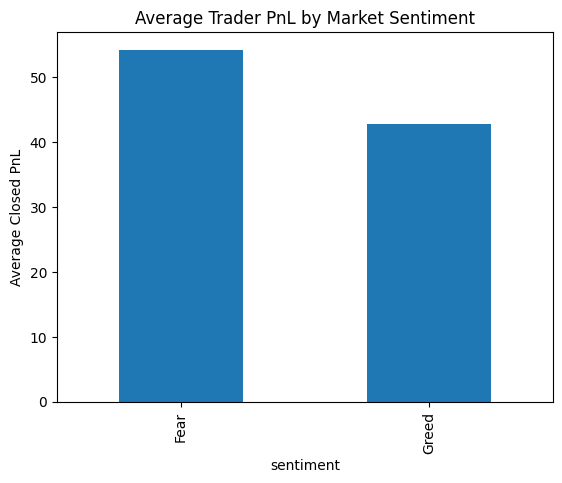

In [9]:
pnl_summary.plot(
    kind="bar",
    title="Average Trader PnL by Market Sentiment",
    ylabel="Average Closed PnL"
)


In [15]:
risk_summary = merged.groupby("sentiment")["Size USD"].mean()
risk_summary



,Size USD
sentiment,
Fear,7816.109931
Greed,5736.884375


<Axes: title={'center': 'Average Risk Exposure (Position Size) by Market Sentiment'}, xlabel='sentiment', ylabel='Average Position Size (USD)'>

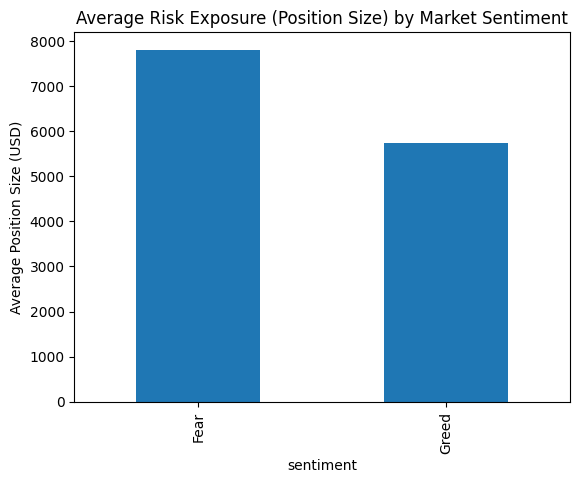

In [16]:
risk_summary.plot(
    kind="bar",
    title="Average Risk Exposure (Position Size) by Market Sentiment",
    ylabel="Average Position Size (USD)"
)


In [20]:
import matplotlib.pyplot as plt


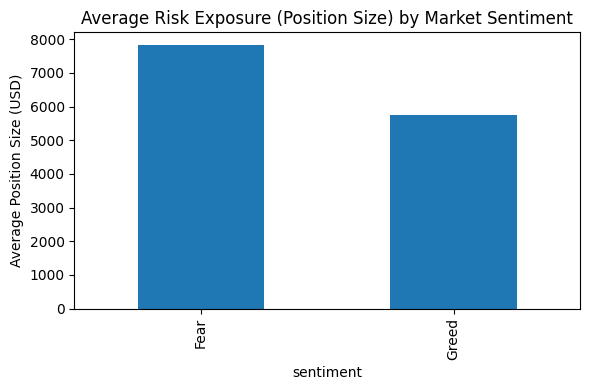

In [21]:
plt.figure(figsize=(6,4))
risk_summary.plot(kind="bar")
plt.title("Average Risk Exposure (Position Size) by Market Sentiment")
plt.ylabel("Average Position Size (USD)")
plt.tight_layout()
plt.savefig("risk_exposure_vs_sentiment.png")
plt.show()


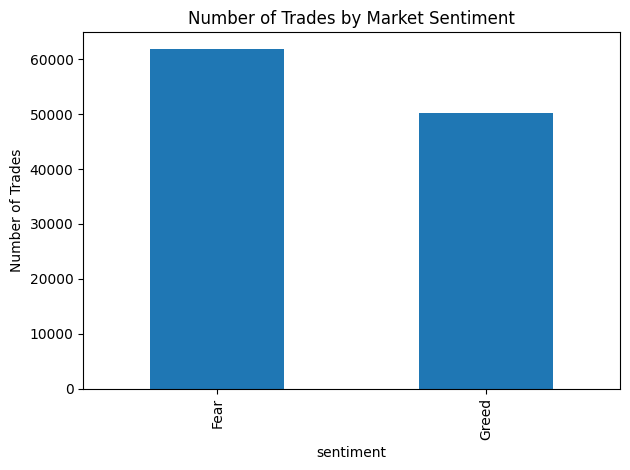

In [22]:
trade_count = merged.groupby("sentiment").size()

trade_count.plot(
    kind="bar",
    title="Number of Trades by Market Sentiment",
    ylabel="Number of Trades"
)
plt.tight_layout()
plt.savefig("trade_count_vs_sentiment.png")
plt.show()


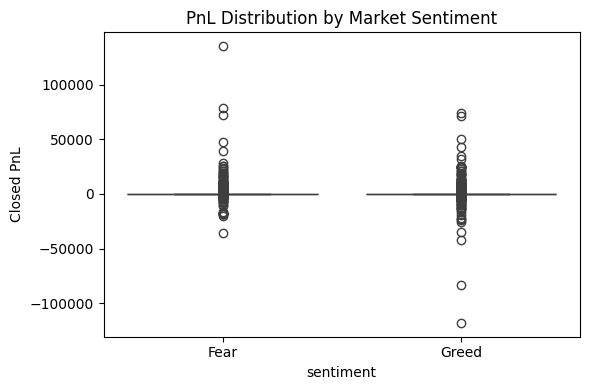

In [23]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(data=merged, x="sentiment", y="Closed PnL")
plt.title("PnL Distribution by Market Sentiment")
plt.tight_layout()
plt.savefig("pnl_distribution_vs_sentiment.png")
plt.show()


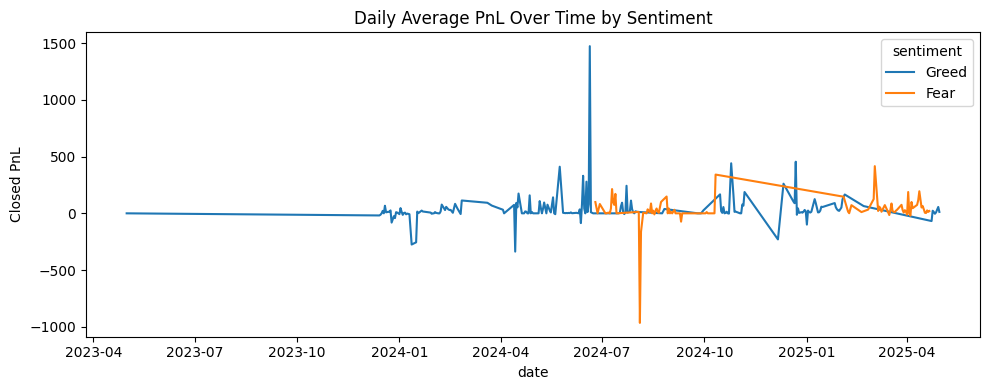

In [24]:
daily_pnl = merged.groupby(["date", "sentiment"])["Closed PnL"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=daily_pnl, x="date", y="Closed PnL", hue="sentiment")
plt.title("Daily Average PnL Over Time by Sentiment")
plt.tight_layout()
plt.savefig("daily_pnl_trend.png")
plt.show()


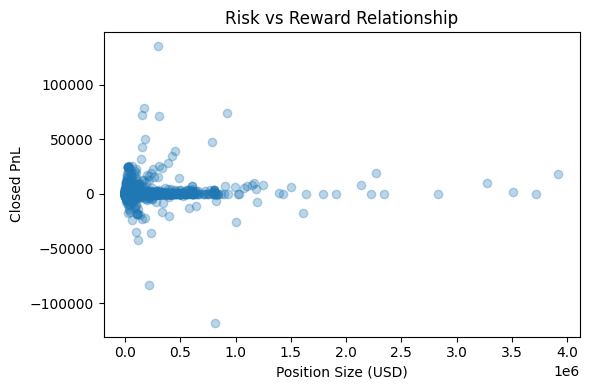

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(merged["Size USD"], merged["Closed PnL"], alpha=0.3)
plt.xlabel("Position Size (USD)")
plt.ylabel("Closed PnL")
plt.title("Risk vs Reward Relationship")
plt.tight_layout()
plt.savefig("risk_vs_pnl.png")
plt.show()


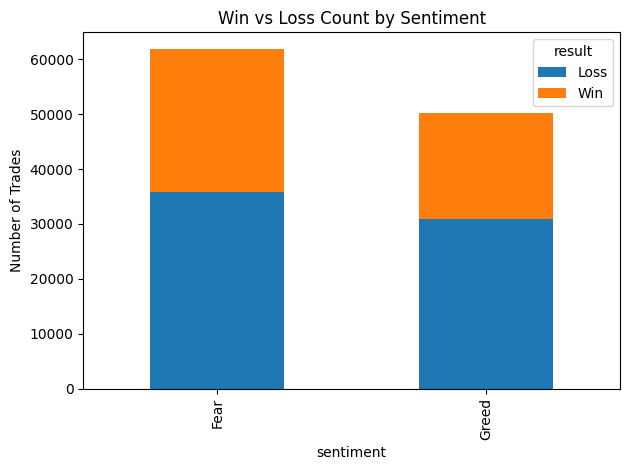

In [26]:
win_loss = merged.assign(
    result=merged["Closed PnL"].apply(lambda x: "Win" if x > 0 else "Loss")
).groupby(["sentiment", "result"]).size().unstack()

win_loss.plot(kind="bar", stacked=True)
plt.title("Win vs Loss Count by Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig("win_loss_count.png")
plt.show()
